# **Clasificación técnica mediante SVM, Árbol de Decisión y Random Forest**

### **Objetivo General**

El código busca implementar, evaluar y comparar tres modelos de aprendizaje supervisado (Regresión Logística, SVM y Árbol de Decisión) para predecir si un cliente realizará una compra o no, basándose en características como edad y salario estimado.

## 1) Resumen del problema
Este repositorio implementa y compara modelos supervisados de **clasificación binaria** para predecir la variable objetivo **Purchased** (Compra / No compra) en función de características como **Age** y **EstimatedSalary** y **Gender**. El flujo cubre EDA, preprocesamiento, entrenamiento, evaluación y comparación experimental.

In [3]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: C:\Users\aavila\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

## 2) Dataset
- Dataset utilizado: `Social_Network_Ads.csv`
- Dominio: comportamiento de usuarios / marketing (decisión de compra)

In [7]:
# Cargar el dataset
df = pd.read_csv("Social_Network_Ads.csv")

Primeras 5 filas del dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Estadísticas descriptivas:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
m

<Figure size 1200x800 with 0 Axes>

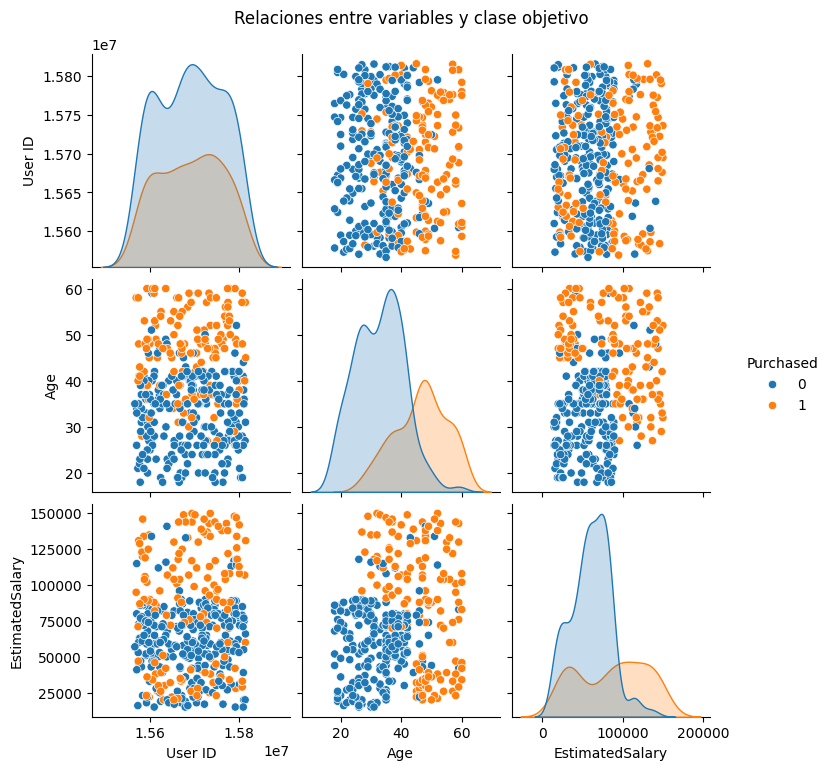

In [8]:
# Visualización inicial de los datos
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualización de correlaciones
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Purchased')
plt.suptitle('Relaciones entre variables y clase objetivo', y=1.02)
plt.savefig('pairplot.png')  # Guardar figura para referencia
plt.show()

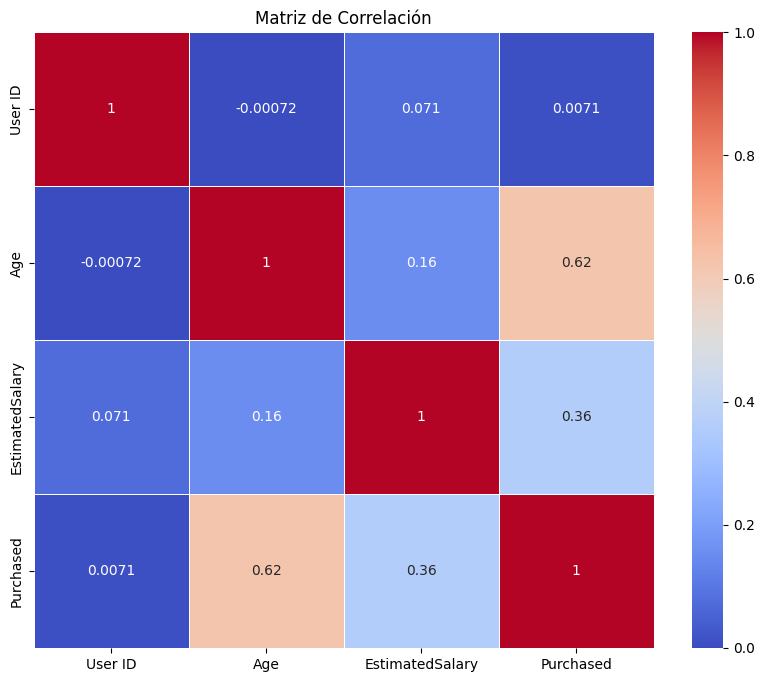

In [9]:
# Matriz de correlación (solo con columnas numéricas)
plt.figure(figsize=(10, 8))
# Seleccionamos solo columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.savefig('correlation_matrix.png')
plt.show()

## 3) Preprocesamiento (Justificación técnica)
El preprocesamiento implementado incluye:
1. Eliminación de columna `User ID` si existe (no aporta valor predictivo).
2. Tratamiento de `Gender` como variable **categórica** (si está disponible) mediante **One-Hot Encoding**, para mantener compatibilidad con modelos de scikit-learn sin forzar un mapeo 0/1 manual.
3. **Escalado** con `StandardScaler()` para normalizar magnitudes (importante para SVM y útil para estabilidad numérica).
4. División de datos en **train/test 80/20** con `random_state=42`.

In [10]:
# 3. Preprocesamiento
# Eliminamos columnas que no vamos a utilizar (si el dataset contiene 'User ID' y 'Gender')
if 'User ID' in df.columns:
    df = df.drop('User ID', axis=1)

# Construcción de X (features)
if 'Gender' in df.columns:
    # One-Hot Encoding para tratar Gender como categórica
    # drop_first=True evita colinealidad en modelos lineales (ej. Regresión Logística)
    gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)

    # Unimos las dummies con las variables numéricas
    X = pd.concat([gender_dummies, df[['Age', 'EstimatedSalary']]], axis=1)
else:
    X = df[['Age', 'EstimatedSalary']]

# Variable objetivo
y = df['Purchased']

In [11]:
# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (320, 3)
Tamaño del conjunto de prueba: (80, 3)


## 4) Modelos implementados
Se entrenan y evalúan modelos supervisados:

### Modelo 1: Regresión Logística (modelo realizado en taller sincrónico de la clase)

### Modelo 2: Random Forest (modelo a realizar en esta actividad)

### Modelo 3: SVM

### Modelo 4: Árbol de Decisión


MODELO 1: REGRESIÓN LOGÍSTICA

Matriz de Confusión (Regresión Logística):
[[50  2]
 [ 7 21]]


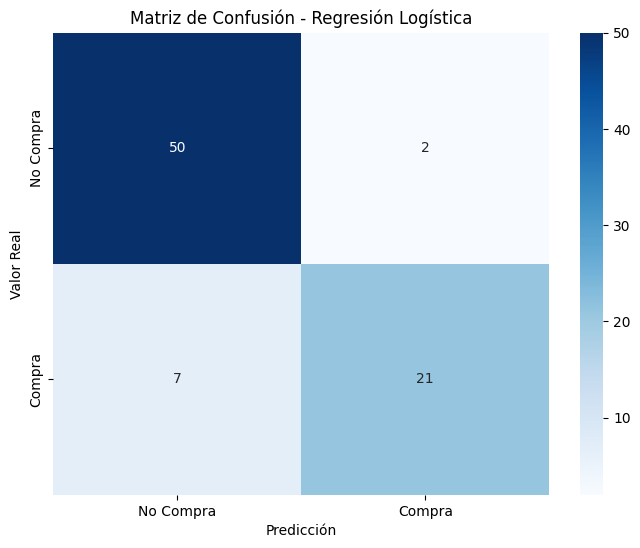


Reporte de Clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80


Coeficientes del modelo de Regresión Logística:
Intercept: -1.0662
Coeficiente para Edad: 0.1364
Coeficiente para Salario Estimado: 2.0377


In [12]:
# 4. Implementación de Regresión Logística
print("\n" + "="*50)
print("MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*50)

# Entrenamiento del modelo
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (Regresión Logística):")
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_lr)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Compra', 'Compra'],
            yticklabels=['No Compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.savefig('confusion_matrix_lr.png')
plt.show()

print("\nReporte de Clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_lr))

# Coeficientes del modelo
print("\nCoeficientes del modelo de Regresión Logística:")
print(f"Intercept: {lr.intercept_[0]:.4f}")
print(f"Coeficiente para Edad: {lr.coef_[0][0]:.4f}")
print(f"Coeficiente para Salario Estimado: {lr.coef_[0][1]:.4f}")



MODELO 1: RANDOM FOREST

Matriz de Confusión (Random Forest):
[[47  5]
 [ 3 25]]


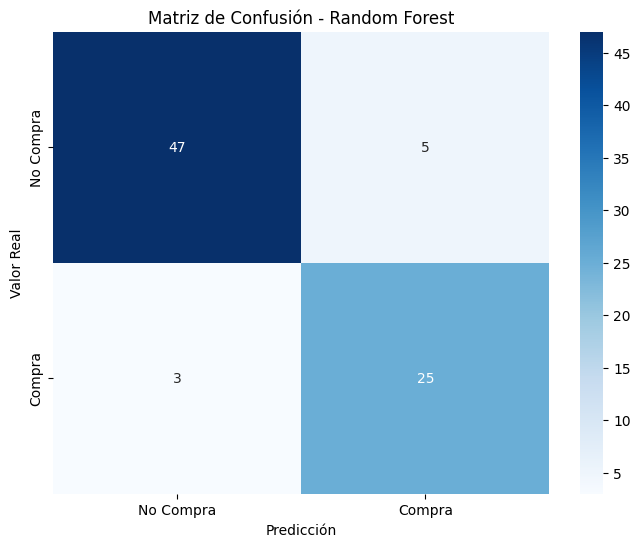


Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80


Importancia de variables (Random Forest):
Importancia para Edad: 0.0107
Importancia para Salario Estimado: 0.4841

Score (accuracy) en train: 0.996875
Score (accuracy) en test: 0.9


In [13]:
# 4. Implementación de Random Forest
print("\n" + "="*50)
print("MODELO 1: RANDOM FOREST")
print("="*50)

# Entrenamiento del modelo
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight=None  # cámbialo a "balanced" si tienes clases desbalanceadas
)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (Random Forest):")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Compra', 'Compra'],
            yticklabels=['No Compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.savefig('confusion_matrix_rf.png')
plt.show()

print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Importancia de variables (análogo a coeficientes en modelos lineales)
print("\nImportancia de variables (Random Forest):")

print(f"Importancia para Edad: {rf.feature_importances_[0]:.4f}")
print(f"Importancia para Salario Estimado: {rf.feature_importances_[1]:.4f}")

# (Opcional) Score de entrenamiento y test para comparar
print("\nScore (accuracy) en train:", rf.score(X_train, y_train))
print("Score (accuracy) en test:", rf.score(X_test, y_test))



MODELO 2: SUPPORT VECTOR MACHINE (SVM)

Matriz de Confusión (SVM):
[[48  4]
 [ 2 26]]


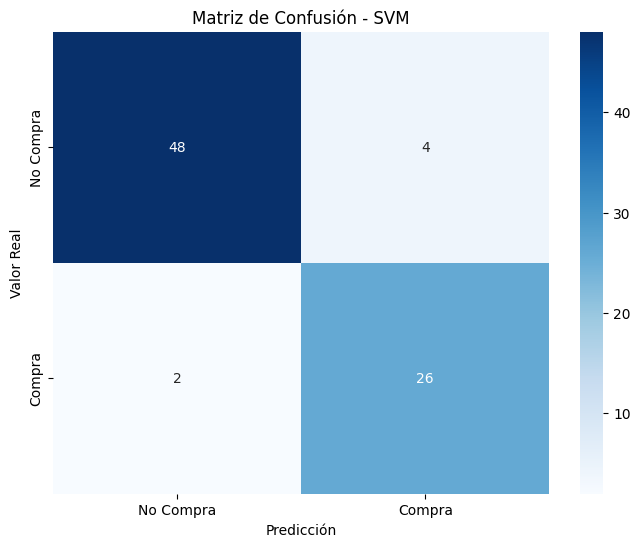


Reporte de Clasificación (SVM):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [14]:
# 5. Implementación de SVM (Support Vector Machine)
print("\n" + "="*50)
print("MODELO 2: SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

# Entrenamiento del modelo
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Predicciones
y_pred_svm = svm.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (SVM):")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Compra', 'Compra'],
            yticklabels=['No Compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVM')
plt.savefig('confusion_matrix_svm.png')
plt.show()

print("\nReporte de Clasificación (SVM):")
print(classification_report(y_test, y_pred_svm))


MODELO 3: ÁRBOL DE DECISIÓN

Matriz de Confusión (Árbol de Decisión):
[[48  4]
 [ 3 25]]


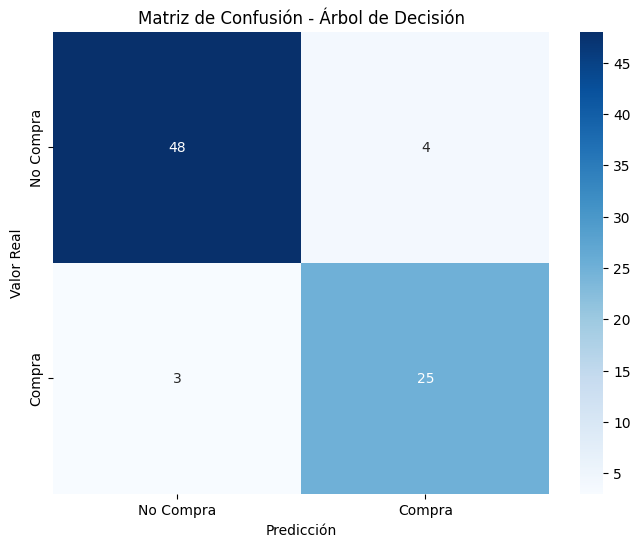


Reporte de Clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80


Importancia de características (Árbol de Decisión):
Importancia de Edad: 0.0000
Importancia de Salario Estimado: 0.5054


In [15]:
# 6. Implementación de Árbol de Decisión
print("\n" + "="*50)
print("MODELO 3: ÁRBOL DE DECISIÓN")
print("="*50)

# Entrenamiento del modelo
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (Árbol de Decisión):")
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(conf_matrix_tree)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Compra', 'Compra'],
            yticklabels=['No Compra', 'Compra'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.savefig('confusion_matrix_tree.png')
plt.show()

print("\nReporte de Clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_tree))

# Importancia de características
print("\nImportancia de características (Árbol de Decisión):")
print(f"Importancia de Edad: {tree.feature_importances_[0]:.4f}")
print(f"Importancia de Salario Estimado: {tree.feature_importances_[1]:.4f}")


## 7) Métricas y evaluación


COMPARACIÓN DE MODELOS CON VALIDACIÓN CRUZADA
Regresión Logística: Accuracy promedio = 0.820, Desviación Estándar = 0.109
Random Forest: Accuracy promedio = 0.847, Desviación Estándar = 0.048
SVM: Accuracy promedio = 0.900, Desviación Estándar = 0.045
Árbol de Decisión: Accuracy promedio = 0.827, Desviación Estándar = 0.062

Resumen de validación cruzada:
                Modelo  Accuracy Promedio  Desviación Estándar
0  Regresión Logística             0.8200             0.109144
1        Random Forest             0.8475             0.048348
2                  SVM             0.9000             0.044721
3    Árbol de Decisión             0.8275             0.061948


C:\Users\aavila\AppData\Local\Temp\ipykernel_27596\4183433072.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Accuracy Promedio', data=cv_df, palette='viridis')


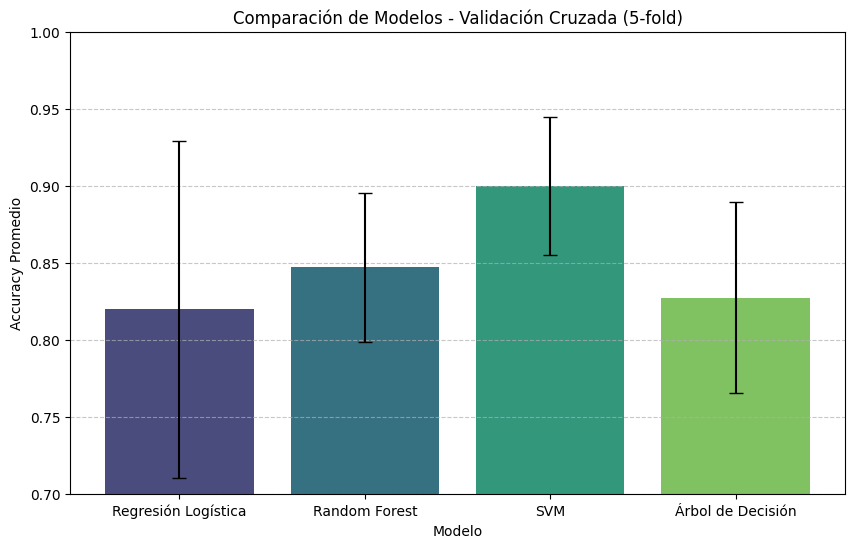

In [16]:
# 7. Comparación de modelos con validación cruzada
print("\n" + "="*50)
print("COMPARACIÓN DE MODELOS CON VALIDACIÓN CRUZADA")
print("="*50)

models = {
    'Regresión Logística': LogisticRegression(random_state=42),
    'Random Forest': rf,
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    'Árbol de Decisión': DecisionTreeClassifier(max_depth=4, random_state=42)
}

# Lista para almacenar resultados
cv_results = []

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results.append({
        'Modelo': name,
        'Accuracy Promedio': scores.mean(),
        'Desviación Estándar': scores.std(),
        'Scores': scores
    })
    print(f"{name}: Accuracy promedio = {scores.mean():.3f}, Desviación Estándar = {scores.std():.3f}")

# Visualización de resultados de validación cruzada
cv_df = pd.DataFrame(cv_results)[['Modelo', 'Accuracy Promedio', 'Desviación Estándar']]
print("\nResumen de validación cruzada:")
print(cv_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Accuracy Promedio', data=cv_df, palette='viridis')
plt.errorbar(x=range(len(cv_df)), y=cv_df['Accuracy Promedio'],
             yerr=cv_df['Desviación Estándar'], fmt='none', color='black', capsize=5)
plt.title('Comparación de Modelos - Validación Cruzada (5-fold)')
plt.ylim(0.7, 1.0)  # Ajustar según los resultados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('cross_validation_comparison.png')
plt.show()


VISUALIZACIÓN DE FRONTERAS DE DECISIÓN
Preparando visualización con 2 dimensiones (Age y EstimatedSalary)...
Generando visualizaciones de fronteras de decisión...


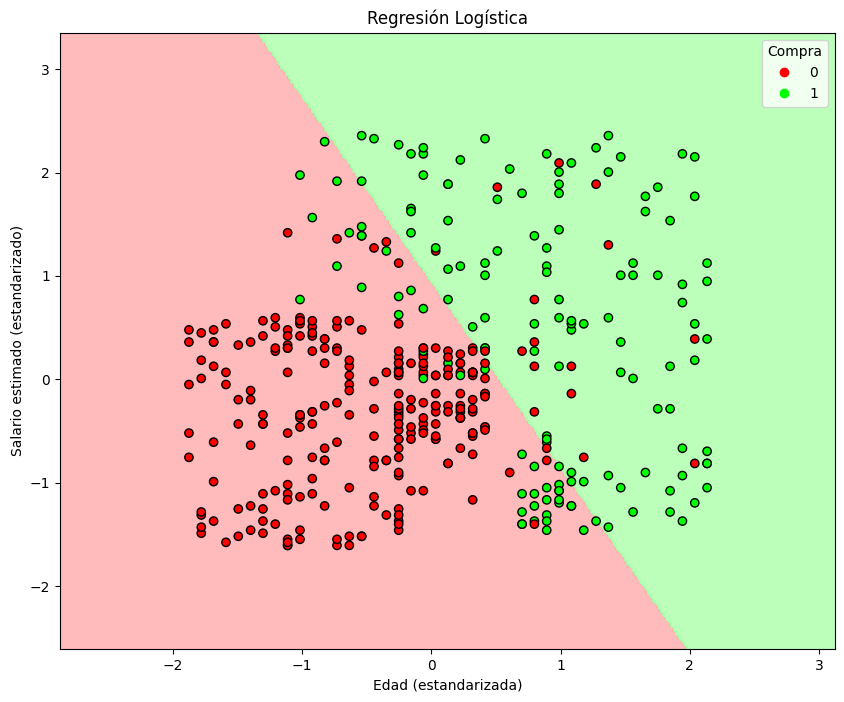

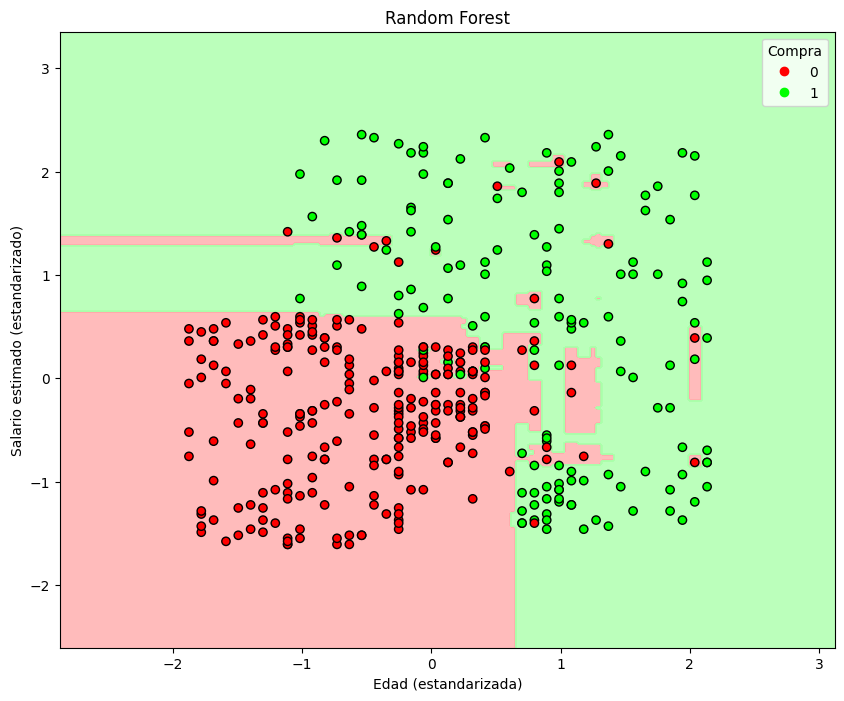

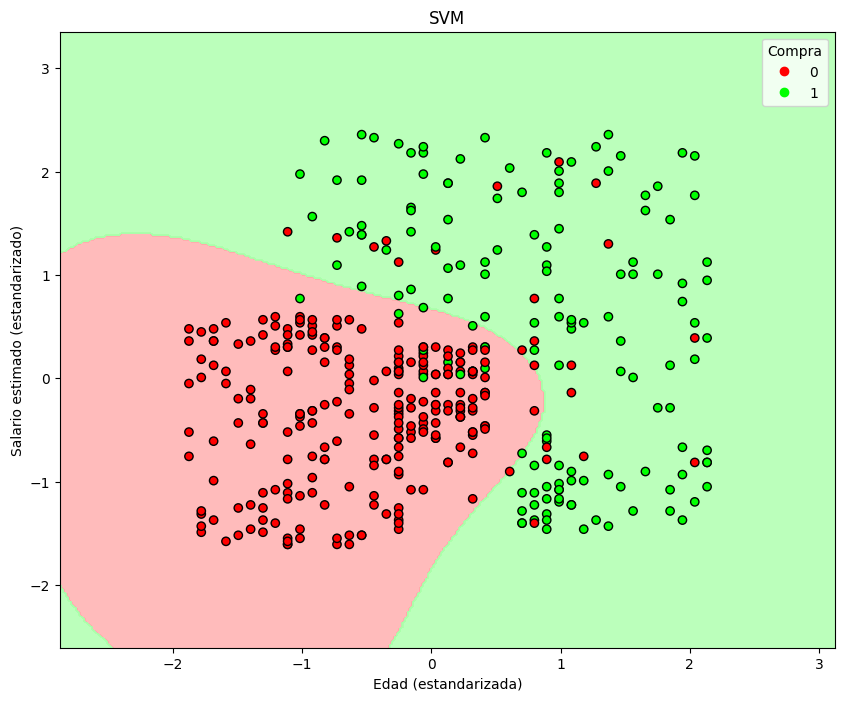

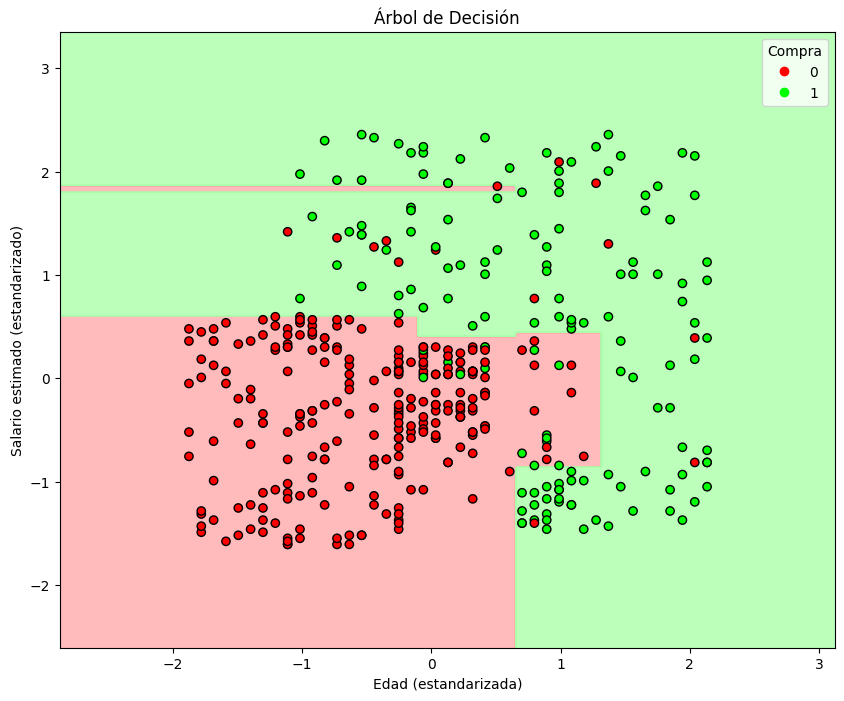


RESPUESTAS A LAS PREGUNTAS TÉCNICAS Y DE INTERPRETACIÓN


In [17]:
# 8. Visualización de fronteras de decisión
print("\n" + "="*50)
print("VISUALIZACIÓN DE FRONTERAS DE DECISIÓN")
print("="*50)

# Para visualizar las fronteras de decisión, usaremos solo Age y EstimatedSalary
print("Preparando visualización con 2 dimensiones (Age y EstimatedSalary)...")

# Entrenamos nuevos modelos con solo 2 características pero usando los mismos datos de entrenamiento
# Seleccionamos solo Age y EstimatedSalary del conjunto de entrenamiento
X_train_2d = X_train[:, -2:] if X_train.shape[1] > 2 else X_train

# Entrenamos modelos con solo 2 dimensiones para la visualización
lr_2d = LogisticRegression(random_state=42)
rf_2d = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1, class_weight=None)
svm_2d = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
tree_2d = DecisionTreeClassifier(max_depth=4, random_state=42)

# Entrenamos estos modelos simplificados
lr_2d.fit(X_train_2d, y_train)
rf_2d.fit(X_train_2d, y_train)
svm_2d.fit(X_train_2d, y_train)
tree_2d.fit(X_train_2d, y_train)

def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir con el modelo
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))

    # Graficar los puntos de entrenamiento
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y,
                         edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']))

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Edad (estandarizada)')
    plt.ylabel('Salario estimado (estandarizado)')
    plt.legend(*scatter.legend_elements(), title="Compra")
    plt.savefig(f'decision_boundary_{title.replace(" ", "_").lower()}.png')
    plt.show()

# Obtenemos datos de X_scaled pero solo las últimas 2 columnas (Age y EstimatedSalary)
X_2d_vis = X_scaled[:, -2:] if X_scaled.shape[1] > 2 else X_scaled

# Visualizar fronteras de decisión para cada modelo (usando solo 2 dimensiones)
print("Generando visualizaciones de fronteras de decisión...")
plot_decision_boundary(lr_2d, X_2d_vis, y, "Regresión Logística")
plot_decision_boundary(rf_2d, X_2d_vis, y, "Random Forest")
plot_decision_boundary(svm_2d, X_2d_vis, y, "SVM")
plot_decision_boundary(tree_2d, X_2d_vis, y, "Árbol de Decisión")

# Respuestas a las preguntas técnicas y de interpretación
print("\n" + "="*50)
print("RESPUESTAS A LAS PREGUNTAS TÉCNICAS Y DE INTERPRETACIÓN")
print("="*50)

In [18]:
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
os.makedirs("results", exist_ok=True)
rows = []
for name, pred in [("Random Forest", y_pred_rf), ("Regresión Logística", y_pred_lr),
                   ("SVM", y_pred_svm), ("Árbol de Decisión", y_pred_tree)]:
    rows.append({"Modelo": name,
                 "Accuracy": accuracy_score(y_test, pred),
                 "Precision": precision_score(y_test, pred, zero_division=0),
                 "Recall": recall_score(y_test, pred, zero_division=0),
                 "F1": f1_score(y_test, pred, zero_division=0)})
summary_df = pd.DataFrame(rows).sort_values("F1", ascending=False)
print("\nTabla resumen de métricas (TEST):\n", summary_df)
summary_df.to_csv("results/summary_metrics.csv", index=False)


Tabla resumen de métricas (TEST):
                 Modelo  Accuracy  Precision    Recall        F1
2                  SVM    0.9250   0.866667  0.928571  0.896552
3    Árbol de Decisión    0.9125   0.862069  0.892857  0.877193
0        Random Forest    0.9000   0.833333  0.892857  0.862069
1  Regresión Logística    0.8875   0.913043  0.750000  0.823529


## **8) Resultados**

### **Rendimiento global (TEST):**
El modelo con mejor desempeño balanceado fue SVM, con Accuracy = 0.925 y F1 = 0.8966, además de un Recall = 0.9286, lo que indica que identifica correctamente la mayoría de casos de “Compra” (clase positiva) sin sacrificar demasiado la precisión (Precision = 0.8667). Esto es consistente con la frontera no lineal observada en la gráfica de SVM (kernel RBF), que se adapta mejor a la separación entre clases. Tal como se explicó en clase al adaptar una forma menos poligonal (línea, cuadrado, rectángulo) puede ajustar mejor una mejor figura para la clasificaión.


### **Comparación visual Random Forest:**
Por otro lado, Random Forest fue más robusto pero ligeramente inferior en este caso (Accuracy = 0.9000, F1 = 0.8621). En la gráfica, su frontera aparece más fragmentada, lo que suele ocurrir por la combinación de múltiples árboles: mejora generalización, pero puede “suavizar” menos la frontera y no necesariamente superar a SVM en este dataset. Otra cuestión relevante es el sobreajuste, que se puede denotar porque hay algunos puntos rojos (no compradores) rodeados de pequeños cuadrados rojos. Según lo revisado en el taller esos resaltamientos específicos de un solo punto muestran un problema de overfitting.

### **Estabilidad (Validación Cruzada 5-fold):**
En la gráfica de validación cruzada, SVM presenta el mayor accuracy promedio, lo que respalda su buen desempeño general y su capacidad de generalizar en diferentes particiones del dataset. En contraste, Regresión Logística muestra una variabilidad alta entre folds (barra de error grande), indicando mayor sensibilidad a la partición de entrenamiento. Random Forest y Árbol quedan en un punto intermedio: rendimiento aceptable con variabilidad moderada.

### **Implicación técnica según el objetivo del problema:**

Si el objetivo es no perder compradores (minimizar falsos negativos), conviene SVM por su Recall alto (0.9286).

Si el objetivo es evitar falsas alarmas de compra (minimizar falsos positivos), la Regresión Logística destaca por su Precision (0.9130), aunque sacrifica recall.

## **9) Resumen**

**SVM:** mejor equilibrio general (F1 más alto) y mayor capacidad de detectar compras (Recall más alto).

**Regresión Logística:** muy conservadora al predecir “Compra” (Precision más alta) pero pierde compradores (FN alto).

**Random Forest:** robusto y buen balance, pero con más falsas compras que los demás (FP mayor).

**Árbol de Decisión:** buen desempeño y razonablemente interpretable; equilibrio similar a RF con menos errores totales.